# Clasificación K-nearest neighbors - Replicación con Ventana de Parzen
## Universidad Politécnica Salesiana
### Por Alexander Siavichay

Disponible en:https://github.com/siavichay/knearest-ParsenWindow/blob/master/KnnParsenWindow.ipynb

En el presente código tenemos un código K-nearest replicado a la Ventana de Parzen

Prerequisitos:
- numpy
- sklearn
- pandas
- math
- collections
- random


$X$ tiene los features de todo excepto la columna class.

$y$ tiene basicamente la columna class.

Con el "cross_validation" tomamos la base de datos completa y la dividimos en una sección para el entrenamiento y otra para el test, con un *test_size* de 0.2 que implica que el 20% de los datos van a ser utilizados para el test.

La base de datos que se va a utilizar es la de *breast-cancer-wisconsin_data.txt* del repositorio para Machine Learning de la Universidad de California.  Se puede encontrar en la siguiente dirección **https://github.com/thechargedneutron/Machine-Learning-for-Python/blob/master/breast-cancer-wisconsin.data.txt**

## Lectura del dataset

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
         
clf =neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
         
accuracy = clf.score(X_test, y_test)
filas = 'el numero de filas es:' + str(len(X_test))
print(filas)
columnas = 'el numero de columnas es:' + str(len(X_test[0]))
print(columnas)
print(accuracy)

datos_ejemplo = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
#datos_ejemplo=datos_ejemplo.reshape(len(example_measures),-1)  #fue necesario readecuar los datos en función de los limites de -1 a 1

prediccion=clf.predict(datos_ejemplo)
print(prediccion)

el numero de filas es:140
el numero de columnas es:9
0.9571428571428572
[2 2]


## Clasificación K-nearest neighbors usando el bucle for

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
import pandas as pd

precisiones = []

for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)

    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

    clf =neighbors.KNeighborsClassifier(n_jobs=-1)  #este tiene parametros implicitos
    clf.fit(X_train, y_train)

    accuracy =clf.score(X_test, y_test)
##print(accuracy)
##example_measures=np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
##example_measures=example_measures.reshape(len(example_measures),-1)  #fue necesario readecuar los datos en funcion de los limites de -1 a 1
##prediccion=clf.predict(example_measures)
##print(prediccion)

    precisiones.append(accuracy)

print(sum(precisiones)/len(precisiones))

0.9697142857142859


## Creación del algoritmo K-Nearest Neighbors

[('k', 2)]
k


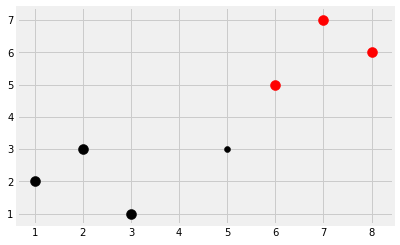

In [4]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')
%matplotlib inline

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}   #dos clases y 6 features
nuevos_val = [5,3]

#for i in dataset:
#    for ii in dataset[i]:
#        plt.scatter(ii[0],ii[1], s=100, color=i)
#[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

#plt.scatter(new_features[0], new_features[1], s=50)
#plt.show()

def k_nearest_neighbors(datos, prediccion, k=3):
    if len(datos) >= k:
        warnings.warn('K debe ser un valor menor al total de grupos, en este caso menor a 3')
        
    distancia = []
    for group in datos:
        for features in datos[group]:
            #distancia_euclidiana=sqrt( (features[0]-prediccion[0])**2 + (features[1]-prediccion[1])**2 )
            distancia_euclidiana = np.linalg.norm(np.array(features)-np.array(prediccion))
            distancia.append([distancia_euclidiana, group])
    
    votos = [i[1] for i in sorted(distancia)[:k]]
    print(Counter(votos).most_common(1))
    resultado_votos = Counter(votos).most_common(1)[0][0]    
    
    return resultado_votos
    
result = k_nearest_neighbors(dataset, nuevos_val, k=3)
print(result)

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(nuevos_val[0], nuevos_val[1], color=result)
plt.show()

In [5]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random
%matplotlib inline

def k_nearest_neighbors(datos, prediccion, k=3):
    if len(datos) >= k:
        warnings.warn('K debe ser un valor menor al total de grupos, en este caso menor a 3')
        
    distancia = []
    for group in datos:
        for features in datos[group]:
            #distancia_euclidiana=sqrt( (features[0]-prediccion[0])**2 + (features[1]-prediccion[1])**2 )
            distancia_euclidiana = np.linalg.norm(np.array(features)-np.array(prediccion))
            distancia.append([distancia_euclidiana, group])
                
    votos = [i[1] for i in sorted(distancia)[:k]]
    #print(Counter(votos).most_common(1))
    resultado_votos = Counter(votos).most_common(1)[0][0]    
    confianza = Counter(votos).most_common(1)[0][1] / k
    
#    print(resultado_votos, confianza)
    return resultado_votos, confianza

precisiones = []

for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data.txt')  # con esta sentencia leemos bases de datos de archivos planos
    df.replace('?',-99999, inplace=True)   
    df.drop(['id'], 1, inplace=True)  # con esta sentencia elimino la 1era columna que tiene que ver con el id de la muestra y que no conlleva información relevante para la clasificación
    full_data = df.astype(float).values.tolist()   # vamos a considerar a todos los valores como flotantes
    random.shuffle(full_data)

    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]                                                                                                                                                                                     

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for datos in test_set[group]:
            votos, confianza = k_nearest_neighbors(train_set, datos, k=5)
            if group == votos:
                correct +=1
            total+=1

    print('Accuracy;', correct/total)
    precisiones.append(correct/total)

print(sum(precisiones)/len(precisiones))

Accuracy; 0.96415770609319
Accuracy; 0.967741935483871
Accuracy; 0.967741935483871
Accuracy; 0.956989247311828
Accuracy; 0.978494623655914
Accuracy; 0.9498207885304659
Accuracy; 0.985663082437276
Accuracy; 0.96415770609319
Accuracy; 0.953405017921147
Accuracy; 0.956989247311828
Accuracy; 0.956989247311828
Accuracy; 0.978494623655914
Accuracy; 0.974910394265233
Accuracy; 0.9713261648745519
Accuracy; 0.967741935483871
Accuracy; 0.96415770609319
Accuracy; 0.9605734767025089
Accuracy; 0.96415770609319
Accuracy; 0.982078853046595
Accuracy; 0.953405017921147
Accuracy; 0.9498207885304659
Accuracy; 0.953405017921147
Accuracy; 0.982078853046595
Accuracy; 0.974910394265233
Accuracy; 0.974910394265233
0.9661648745519713


## Algoritmo utilizando la Ventana de Parzen

El algoritmo de la Ventana de Parzen conocido también como la Ventana de Parzen-Rosenblatt es un método no paramétrico que calcula la función de densidad de probabilidad (pdf) de un punto específico de p(x) a partir de una muestra p(xn) sin la necesidad de especificar una una distribución o conocimiento previo.

Nuestro objetivo
<img src="parzen_goal.png" alt="Parzen goal overview">
Fuente:https://sebastianraschka.com/images/blog/2014


In [12]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

"""
Implementación de la función de la ventana.
Retorna 1 si el vector está dentro de un hypercubo centrado con el origen, caso contrario 0
"""

def window_function(x_vec, unit_len=1):

    for row in x_vec:
        if np.abs(row) > (unit_len/2):
            return 0
    return 1


def parzen(datos, prediccion, k=3):
    '''
    Modificación del código aplicando la Ventana de Parzen
    
    Argumentos:
        datos: Arreglo numpy, cada muestra esta separada.
        podemos optar por recibir el valor de h que es la longitud del hipercubo.
        center: Las coordenandas del centro del hyperucbo
        Retorna la pdf al observar las k  muestras dentro del hypercubo.
    '''
    
    
    if len(datos) >= k:
        warnings.warn('K debe ser un valor menor al total de grupos, en este caso menor a 3')
        
#Se predefine un vallor para h
    h=1
    
########################################
    distancia = []
    for group in datos:
        for features in datos[group]:
            #distancia_euclidiana=sqrt( (features[0]-prediccion[0])**2 + (features[1]-prediccion[1])**2 )
            #distancia_euclidiana = np.linalg.norm(np.array(features)-np.array(prediccion))

            #REEMPLAZAMOS LA DISTANCIA EUCLIDIANA POR LA DE PARZEN
            
            distancia_p = window_function(np.array(features)-np.array(prediccion),h) #SE DEFINE COMO distancia_p
            distancia.append([distancia_p, group])
                            
    votos = [ i[1] for i in sorted(distancia)[:k] ]
    #print(distancia)
    
    resultado_votos = Counter(votos).most_common(1)[0][0]   
    confianza = Counter(votos).most_common(1)[0][1] 
    
    #print(resultado_votos, confianza)
    return resultado_votos, confianza

precisiones = []


##Evaluando los datos
for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data.txt')  # con esta sentencia leemos bases de datos de archivos planos
    df.replace('?',-99999, inplace=True)   
    df.drop(['id'], 1, inplace=True)  # con esta sentencia elimino la 1era columna que tiene que ver con el id de la muestra y que no conlleva información relevante para la clasificación
    full_data = df.astype(float).values.tolist()   # vamos a considerar a todos los valores como flotantes
    random.shuffle(full_data)

    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]                                                                                                                                                                                     

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for datos in test_set[group]:
            votos, confianza = parzen(train_set, datos, k=5)
            if group == votos:
                correct +=1
            total+=1

    print('Accuracy;', correct/total)
    precisiones.append(correct/total)

print(sum(precisiones)/len(precisiones))

Accuracy; 0.6415770609318996
Accuracy; 0.6344086021505376
Accuracy; 0.6451612903225806
Accuracy; 0.6523297491039427
Accuracy; 0.6415770609318996
Accuracy; 0.6308243727598566
Accuracy; 0.6236559139784946
Accuracy; 0.6523297491039427
Accuracy; 0.6523297491039427
Accuracy; 0.6451612903225806
Accuracy; 0.6630824372759857
Accuracy; 0.6559139784946236
Accuracy; 0.6594982078853047
Accuracy; 0.6451612903225806
Accuracy; 0.6559139784946236
Accuracy; 0.6810035842293907
Accuracy; 0.6487455197132617
Accuracy; 0.6272401433691757
Accuracy; 0.6523297491039427
Accuracy; 0.6415770609318996
Accuracy; 0.6308243727598566
Accuracy; 0.6164874551971327
Accuracy; 0.6774193548387096
Accuracy; 0.6272401433691757
Accuracy; 0.6810035842293907
0.6473118279569893


## Testeando con otra estructura

In [15]:
class ParzenWindow:
    h = None
    x_train = None
    y_train = None
    classes = None

    def __init__(self, h = 1):
        self.h = h

    def Fit(self, x, y):
        self.x_train = x
        self.y_train = y
        self.classes = list(set(y))

#Predicciones desde muestras
    def Predict(self, x):
        num_test_samples = x.shape[0]
        classes = self.classes
        h = self.h

        predictions = []
        for i in range(num_test_samples):

            x_ = self.x_train - x[i, :]
            x_ = np.abs(x_).max(axis = 1)
            temp_ = x_ < h / 2

            temp_ = self.y_train[temp_]
            count = 0
            prediction = classes[0]
            for j in classes:
                t_ = (temp_ == j).sum()
                if(t_ > count):
                    count = t_
                    prediction = j

            predictions.append(prediction)
       
            
        return np.array(predictions)


In [14]:
#Evaluando la ventana
train=np.array(train_data)
test=np.array(test_data)

for h in np.arange(0,10,1):
    
    p=ParzenWindow(h=h)
    p.Fit(train[:,0:-1],train[:,-1])
    
    correctos=(p.Predict(test[:,0:-1]) == test[:,-1]).sum()
    correctos
    print (correctos/len(test_data))

0.6810035842293907
0.6917562724014337
0.6917562724014337
0.6953405017921147
0.6953405017921147
0.7849462365591398
0.7849462365591398
0.9139784946236559
0.9139784946236559
0.9605734767025089
